# Занятие № 2 по изучению характера поведения пользователей

## выполнил Колеганов Николай

# Справочно:
БД данные по продажам (часть таблицы Orders в csv, исходник здесь
https://drive.google.com/drive/folders/1C3HqIJcABblKM2tz8vPGiXTFT7MisrML?usp=sharin

Статья по прогонозу с учетом сезонности и тренда. ( https://4analytics.ru/prognozirovanie/kak-rasschitat-prognoz-prodaj-s-uchetom-rosta-i-sezonnosti-v-excel.html ).

# Задача

Прочитать статью и потом на основе данных к прошлому ДЗ сделать прогноз ТО на 2018 по этой методологии. И сравнить с фактом:

ГГММ Сумма

1801 256798898

1802 232640416

1803 267994924

1804 262849522

1805 276933049

1806 251486085

1807 250559778

1808 261724749

1809 276675505

1810 287647539

1811 363102609

1812 422386052



## Загрузка библиотек

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Загружаем БД по продажам

In [0]:
file = files.upload()

Saving orders_20190822.csv to orders_20190822.csv


In [0]:
!ls

orders_20190822.csv  sample_data


In [0]:
orders = pd.read_csv('orders_20190822.csv', sep=';')
a = orders.shape[0]
print(f'Первоначальное количество строк = {a}')

Первоначальное количество строк = 2002804


In [0]:
orders.head()

,id_o,user_id,price,o_date
0,1234491,337544,"539,000",01.01.2016
1,1234494,171642,"153,300",01.01.2016
2,1234497,260596,"55,300",01.01.2016
3,1234498,1105609,"752,500",01.01.2016
4,1234500,982696,"4410,000",01.01.2016


## конвертация данных

In [0]:
def convert_data(data):
    new_data = data.replace(',','.')
    return float(new_data)

In [0]:
orders['price'] = orders['price'].apply(convert_data)

In [0]:
orders['o_date'] = pd.to_datetime(pd.Series(orders['o_date']), format="%d.%m.%Y")

In [0]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002804 entries, 0 to 2002803
Data columns (total 4 columns):
 #   Column   Dtype         
---  ------   -----         
 0   id_o     int64         
 1   user_id  int64         
 2   price    float64       
 3   o_date   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 61.1 MB


## убираем строки с неположительной и слишком большой ценой

In [0]:
negative_list = orders.loc[(orders['price'] <= 0)|(orders['price'] > 100000)]
orders = orders.drop(negative_list.index, axis = 0)

In [0]:
orders.head()

,id_o,user_id,price,o_date
0,1234491,337544,539.0,2016-01-01
1,1234494,171642,153.3,2016-01-01
2,1234497,260596,55.3,2016-01-01
3,1234498,1105609,752.5,2016-01-01
4,1234500,982696,4410.0,2016-01-01


## Сортируем данные по годам и суммируем доход по месяцам

In [0]:
orders_2016 = orders.loc[orders['o_date'].dt.year == 2016, :]
orders_2017 = orders.loc[orders['o_date'].dt.year == 2017, :]

In [0]:
month_sum_orders_2016 = orders_2016.groupby(orders_2016['o_date'].dt.month, as_index=False)[['price']].sum().rename(columns={'price':'month_sum_2016'})

In [0]:
month_sum_orders_2016

,month_sum_2016
0,9.671165e+07
1,9.513467e+07
2,1.152706e+08
3,1.391769e+08
4,1.085874e+08
5,1.165690e+08
6,1.120983e+08
7,1.392560e+08
8,1.512398e+08
9,2.115090e+08


In [0]:
month_sum_orders_2017 = orders_2017.groupby(orders_2017['o_date'].dt.month, as_index=False)[['price']].sum().rename(columns={'price':'month_sum_2017'})

In [0]:
month_sum_orders_2017

,month_sum_2017
0,1.767653e+08
1,1.611962e+08
2,2.146468e+08
3,1.972572e+08
4,2.167369e+08
5,1.844345e+08
6,1.867044e+08
7,2.057518e+08
8,2.110780e+08
9,2.796451e+08


## Сохраняем данные в Excel

In [0]:
month_sum_orders_2016.to_excel('month_sum_orders_2016.xlsx')
month_sum_orders_2017.to_excel('month_sum_orders_2017.xlsx')

## Выгружаем данные для локальной обработки

In [0]:
files.download('month_sum_orders_2016.xlsx')

In [0]:
files.download('month_sum_orders_2017.xlsx')

## Загружаем снимки полученных результатов

In [0]:
file = files.upload()

Saving диаграмма.png to диаграмма.png


In [0]:
import cv2

## Получившиеся данные

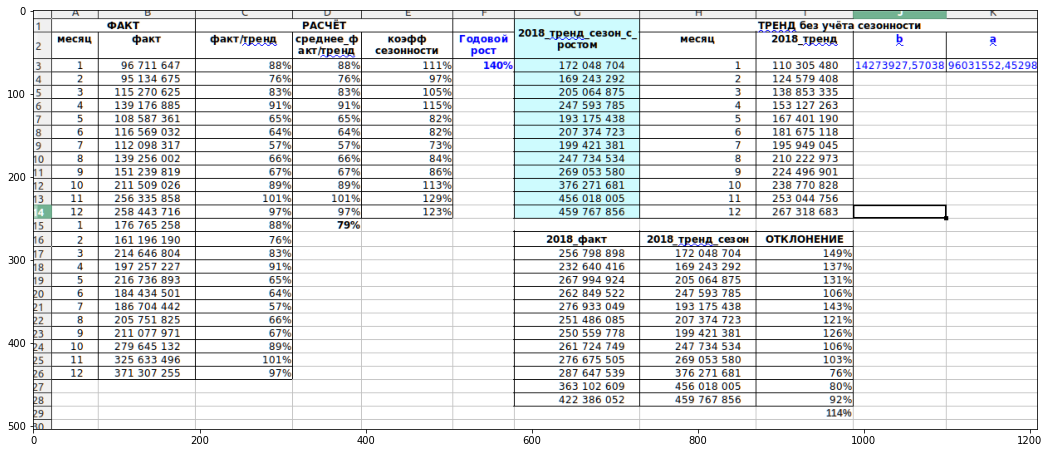

In [0]:
imgColor = cv2.imread('общий.png')
plt.figure(figsize=(18,14))
plt.imshow(imgColor);

## Получившиеся диаграмма

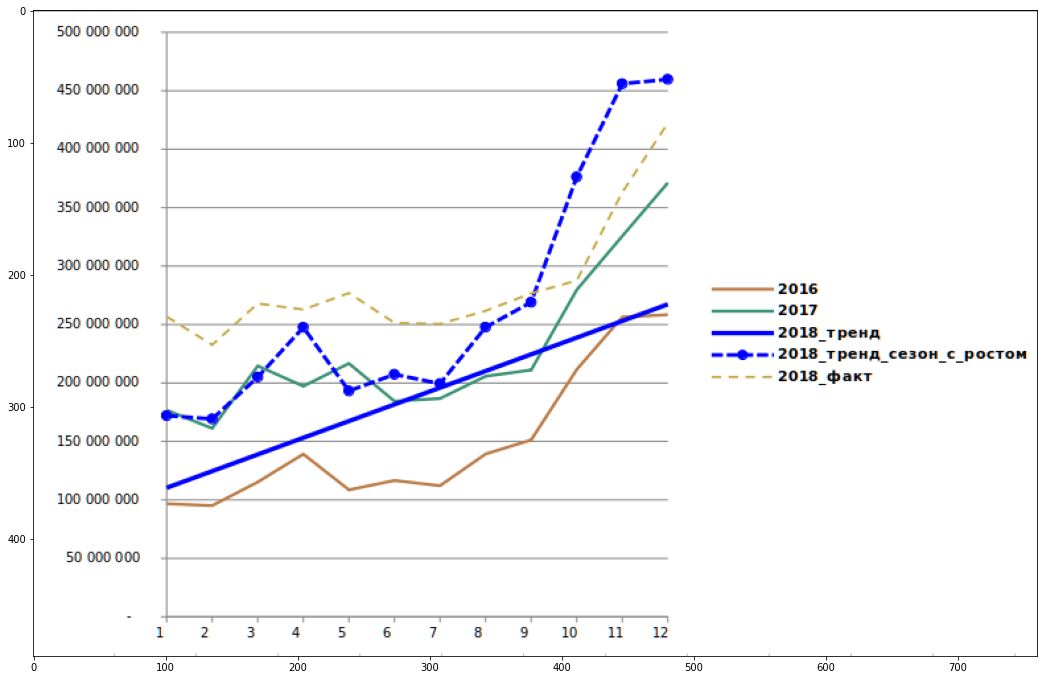

In [0]:
imgColor = cv2.imread('диаграмма.png')
plt.figure(figsize=(18,14))
plt.imshow(imgColor);